In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [4]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [5]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [6]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [7]:
def val_extractor(optmizer_name):
    sparsity_base  = sparsity_val_extractor(f'sparsity_selectivity_batchsize_50_50_{optmizer_name}.txt')
    sparsity_con1  = sparsity_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    sparsity_con5  = sparsity_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    sparsity_con10 = sparsity_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    selectivity_base_avg, selectivity_base_std  = selectivity_val_extractor(f'sparsity_selectivity_batchsize_50_50_{optmizer_name}.txt')
    selectivity_con1_avg, selectivity_con1_std   = selectivity_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    selectivity_con5_avg, selectivity_con5_std   = selectivity_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    selectivity_con10_avg, selectivity_con10_std = selectivity_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    test_base  = test_val_extractor(f'sparsity_selectivity_batchsize_50_50_{optmizer_name}.txt')
    test_con1 = test_val_extractor(f'sparsity_selectivity_batchsize_1_50_{optmizer_name}.txt')
    test_con5 = test_val_extractor(f'5subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    test_con10 = test_val_extractor(f'10subsebatch1_sparsity_selectivity_{optmizer_name}.txt')
    
    return test_con1, sparsity_con1, selectivity_con1_avg, selectivity_con1_std, test_con5, sparsity_con5, selectivity_con5_avg, selectivity_con5_std, test_con10, sparsity_con10, selectivity_con10_avg, selectivity_con10_std, test_base, sparsity_base, selectivity_base_avg, selectivity_base_std

In [8]:
con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('SGD')  

# Graph

[]

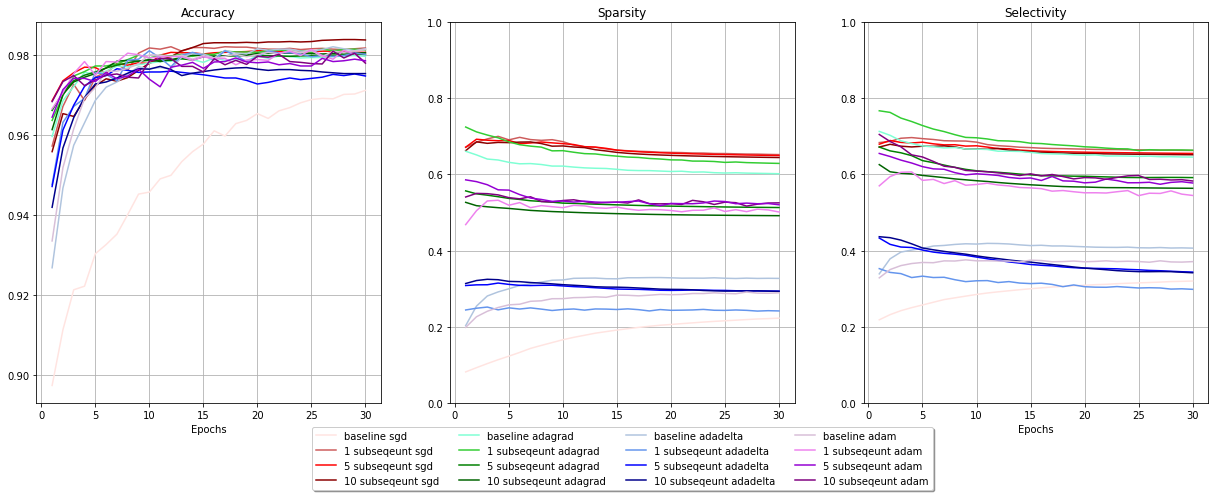

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

# accuracy plot 
con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('SGD')  

ax1.plot(np.linspace(1,30,30), base, label='baseline sgd', color='mistyrose')
ax1.plot(np.linspace(1,30,30), con1, label='1 subseqeunt sgd', color='indianred')
ax1.plot(np.linspace(1,30,30), con5, label='5 subseqeunt sgd', color='red')
ax1.plot(np.linspace(1,30,30), con10, label='10 subseqeunt sgd', color='darkred')

ax2.plot(np.linspace(1,30,30), spar_base, label='baseline sgd', color='mistyrose')
ax2.plot(np.linspace(1,30,30), spar_con1, label='1 subseqeunt sgd', color='indianred')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 subseqeunt sgd', color='red')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 subseqeunt sgd', color='darkred')

ax3.plot(np.linspace(1,30,30), selec_avg_base, label='baseline sgd', color='mistyrose')
ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 subseqeunt sgd', color='indianred')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 subseqeunt sgd', color='red')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 subseqeunt sgd', color='darkred')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adagrad')  

ax1.plot(np.linspace(1,30,30), base, label='baseline adagrad', color='aquamarine')
ax1.plot(np.linspace(1,30,30), con1, label='1 subseqeunt adagrad', color='limegreen')
ax1.plot(np.linspace(1,30,30), con5, label='5 subseqeunt adagrad', color='green')
ax1.plot(np.linspace(1,30,30), con10, label='10 subseqeunt adagrad', color='darkgreen')

ax2.plot(np.linspace(1,30,30), spar_base, label='baseline adagrad', color='aquamarine')
ax2.plot(np.linspace(1,30,30), spar_con1, label='1 subseqeunt adagrad', color='limegreen')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 subseqeunt adagrad', color='green')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 subseqeunt adagrad', color='darkgreen')

ax3.plot(np.linspace(1,30,30), selec_avg_base, label='baseline adagrad', color='aquamarine')
ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 subseqeunt adagrad', color='limegreen')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 subseqeunt adagrad', color='green')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 subseqeunt adagrad', color='darkgreen')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adadelta')  

ax1.plot(np.linspace(1,30,30), base, label='baseline adadelta', color='lightsteelblue')
ax1.plot(np.linspace(1,30,30), con1, label='1 subseqeunt adadelta', color='cornflowerblue')
ax1.plot(np.linspace(1,30,30), con5, label='5 subseqeunt adadelta', color='blue')
ax1.plot(np.linspace(1,30,30), con10, label='10 subseqeunt adadelta', color='darkblue')

ax2.plot(np.linspace(1,30,30), spar_base, label='baseline adadelta', color='lightsteelblue')
ax2.plot(np.linspace(1,30,30), spar_con1, label='1 subseqeunt adadelta', color='cornflowerblue')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 subseqeunt adadelta', color='blue')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 subseqeunt adadelta', color='darkblue')

ax3.plot(np.linspace(1,30,30), selec_avg_base, label='baseline adadelta', color='lightsteelblue')
ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 subseqeunt adadelta', color='cornflowerblue')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 subseqeunt adadelta', color='blue')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 subseqeunt adadelta', color='darkblue')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adam')  

ax1.plot(np.linspace(1,30,30), base, label='baseline adam', color='thistle')
ax1.plot(np.linspace(1,30,30), con1, label='1 subseqeunt adam', color='violet')
ax1.plot(np.linspace(1,30,30), con5, label='5 subseqeunt adam', color='purple')
ax1.plot(np.linspace(1,30,30), con10, label='10 subseqeunt adam', color='darkviolet')

ax2.plot(np.linspace(1,30,30), spar_base, label='baseline adam', color='thistle')
ax2.plot(np.linspace(1,30,30), spar_con1, label='1 subseqeunt adam', color='violet')
ax2.plot(np.linspace(1,30,30), spar_con5, label='5 subseqeunt adam', color='purple')
ax2.plot(np.linspace(1,30,30), spar_con10, label='10 subseqeunt adam', color='darkviolet')

ax3.plot(np.linspace(1,30,30), selec_avg_base, label='baseline adam', color='thistle')
ax3.plot(np.linspace(1,30,30), selec_avg_con1, label='1 subseqeunt adam', color='violet')
ax3.plot(np.linspace(1,30,30), selec_avg_con5, label='5 subseqeunt adam', color='darkviolet')
ax3.plot(np.linspace(1,30,30), selec_avg_con10, label='10 subseqeunt adam', color='purple')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_title('Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax1.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

ax2.set_ylim([0, 1])
ax3.set_ylim([0, 1])

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.05),
          fancybox=True, shadow=True, ncol=4)

plt.plot()


[]

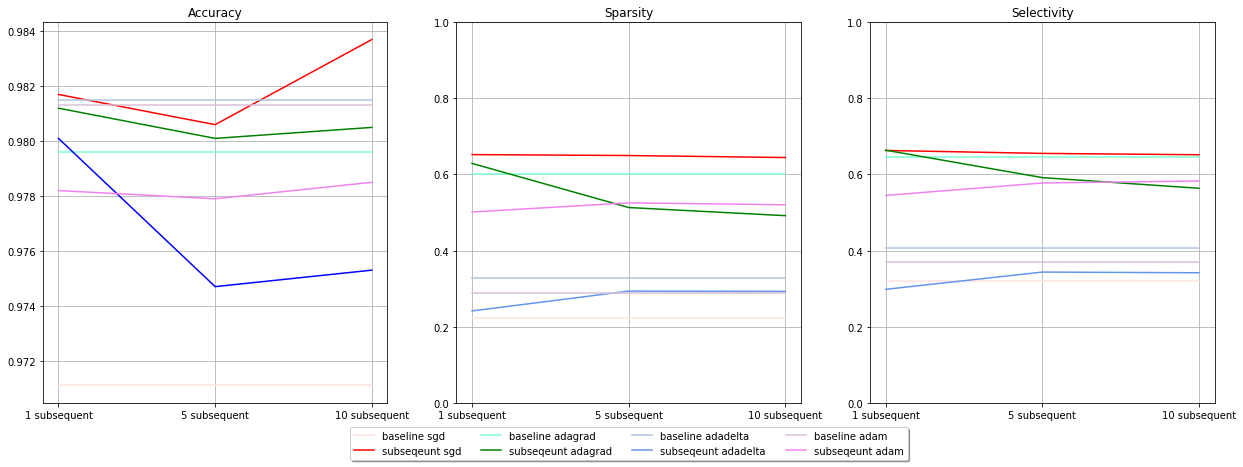

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

hl_ticks = ['1 subsequent', '5 subsequent', '10 subsequent']
ax1.set_xticks(np.linspace(1, 3, 3))
ax1.set_xticklabels(hl_ticks)

ax2.set_xticks(np.linspace(1, 3, 3))
ax2.set_xticklabels(hl_ticks)

ax3.set_xticks(np.linspace(1, 3, 3))
ax3.set_xticklabels(hl_ticks)


# accuracy plot 
con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('SGD')  
ax1.plot(np.linspace(1,3,3), [base[-1],base[-1],base[-1]], label='baseline sgd', color='mistyrose')
ax1.plot(np.linspace(1,3,3), [con1[-1],con5[-1],con10[-1]], label='subseqeunt sgd', color='red')
ax2.plot(np.linspace(1,3,3), [spar_base[-1],spar_base[-1],spar_base[-1]], label='baseline sgd', color='mistyrose')
ax2.plot(np.linspace(1,3,3), [spar_con1[-1],spar_con5[-1],spar_con10[-1]], label='subseqeunt sgd', color='red')
ax3.plot(np.linspace(1,3,3), [selec_avg_base[-1],selec_avg_base[-1],selec_avg_base[-1]], label='baseline sgd', color='mistyrose')
ax3.plot(np.linspace(1,3,3), [selec_avg_con1[-1],selec_avg_con5[-1],selec_avg_con10[-1]], label='subseqeunt sgd', color='red')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adagrad')  
ax1.plot(np.linspace(1,3,3), [base[-1],base[-1],base[-1]], label='baseline adagrad', color='aquamarine')
ax1.plot(np.linspace(1,3,3), [con1[-1],con5[-1],con10[-1]], label='subseqeunt adagrad', color='green')
ax2.plot(np.linspace(1,3,3), [spar_base[-1],spar_base[-1],spar_base[-1]], label='baseline adagrad', color='aquamarine')
ax2.plot(np.linspace(1,3,3), [spar_con1[-1],spar_con5[-1],spar_con10[-1]], label='subseqeunt adagrad', color='green')
ax3.plot(np.linspace(1,3,3), [selec_avg_base[-1],selec_avg_base[-1],selec_avg_base[-1]], label='baseline adagrad', color='aquamarine')
ax3.plot(np.linspace(1,3,3), [selec_avg_con1[-1],selec_avg_con5[-1],selec_avg_con10[-1]], label='subseqeunt adagrad', color='green')

con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adadelta')  
ax1.plot(np.linspace(1,3,3), [base[-1],base[-1],base[-1]], label='baseline adadelta', color='lightsteelblue')
ax1.plot(np.linspace(1,3,3), [con1[-1],con5[-1],con10[-1]], label='subseqeunt adadelta', color='blue')
ax2.plot(np.linspace(1,3,3), [spar_base[-1],spar_base[-1],spar_base[-1]], label='baseline adadelta', color='lightsteelblue')
ax2.plot(np.linspace(1,3,3), [spar_con1[-1],spar_con5[-1],spar_con10[-1]], label='subseqeunt adadelta', color='cornflowerblue')
ax3.plot(np.linspace(1,3,3), [selec_avg_base[-1],selec_avg_base[-1],selec_avg_base[-1]], label='baseline adadelta', color='lightsteelblue')
ax3.plot(np.linspace(1,3,3), [selec_avg_con1[-1],selec_avg_con5[-1],selec_avg_con10[-1]], label='subseqeunt adadelta', color='cornflowerblue')


con1, spar_con1, selec_avg_con1, selec_std_con1, con5, spar_con5, selec_avg_con5, selec_std_con5, con10, spar_con10, selec_avg_con10, selec_std_con10, base, spar_base, selec_avg_base, selec_std_base = val_extractor('Adam')  
ax1.plot(np.linspace(1,3,3), [base[-1],base[-1],base[-1]], label='baseline adam', color='thistle')
ax1.plot(np.linspace(1,3,3), [con1[-1],con5[-1],con10[-1]], label='subseqeunt adam', color='violet')
ax2.plot(np.linspace(1,3,3), [spar_base[-1],spar_base[-1],spar_base[-1]], label='baseline adam', color='thistle')
ax2.plot(np.linspace(1,3,3), [spar_con1[-1],spar_con5[-1],spar_con10[-1]], label='subseqeunt adam', color='violet')
ax3.plot(np.linspace(1,3,3), [selec_avg_base[-1],selec_avg_base[-1],selec_avg_base[-1]], label='baseline adam', color='thistle')
ax3.plot(np.linspace(1,3,3), [selec_avg_con1[-1], selec_avg_con5[-1],selec_avg_con10[-1]], label='subseqeunt adam', color='violet')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_title('Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax2.set_ylim([0, 1])
ax3.set_ylim([0, 1])

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.05),
          fancybox=True, shadow=True, ncol=4)

plt.plot()
